# LDA Topic Modeling

#### Credits: 
1. https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
2. https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
3. https://github.com/RaRe-Technologies/gensim/issues/2163

#### Introduction:
Topic Modeling, an unsupervised machine learning approach was used to uncover hidden themes/topics that were present in ESA pdf files. One of the most popular topic modeling algorithm called LDA (Latent Drichlet Allocation) from Gensim package was employed. LDA is an automated algorithm that can read through the text documents and automatically output the topics discussed. LDA’s approach to topic modeling is that it considers each document to be a collection of topics and each topic to be made of group of words. Thus, latent or hidden topics in a corpus can be found out through the collection of dominant words that frequently co-occur.

#### Notes:
1. The functionality to run Latent Dirichlet Allocation (LDA) with the Mallet’s implementation (via Gensim) has also been provided in the python code. Mallet is known to run faster and provides better topics segregation
2. ESA documents frequently contains bigrams such as ‘perenial_herb’, ‘hydrovac_slurry’, ‘beaver_dam’ etc. These bigrams convey a meaning that is not apparent when considering the either words individually. Therefore, we decided to collect bigrams alongside uni-grams. There is also an option available to generate the tri-grams which we have included in our code but not implemented in the analysis

#### Objective: 
To understand the themes\topics that were present in the ESA pdf files

#### Input: 
The input for LDA topic model is the corpus of the noun extracted .txt files saved on a local directory

#### Output:
The output of LDA Topic Modeling is:
1. pyLDAvis interactive visualization which can also be downloaded as an HTML file, which contains two panels, left as well as right. The left panel represents topics in the form of bubbles and right panel shows the top 30 keywords associated with the topics
2. .csv file which shows what topic number has been assigned to each document in corpus

#### Packages Used:
1. Core packages used:
    * Gensim
    * pyLDAvis
2. Packages for data handling and visualization
    * matplotlib
    * pandas

#### Import required modules

In [2]:
import pandas as pd #package for data handling and visualization
from pprint import pprint
import os
import codecs

#Gensim modules
import gensim #core package used
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#Plotting modules
import pyLDAvis #core package used
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt #package for data handling and visualization
#%matplotlib inline  #If you want to add plots to your Jupyter notebook, then %matplotlib inline is a standard solution. This commaqnd only draw static images in the notebook

#Enable logging for gensim - optional
import logging #With the logging module imported, you can use something called a “logger” to log messages that you want to see.By indicating the level = ERROR, we are interested in seeing ERROR messages
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#### Read all files in the directory and open each file one-by-one 

In [3]:
list_documents = []
files = os.listdir("X:/xxx/xxx/xxx/xxx/") #directory path where noun extracted .txt files are saved
for file in files:
    if file.endswith('.txt'):
        with codecs.open("X:/xxx/xxx/xxx/xxx/" + file,'r', encoding='utf-8') as corpus: #directory path where noun extracted .txt files are saved
            list_documents.append(corpus.read())

#### Tokenize words and remove unwanted text

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

word_tokens = list(sent_to_words(list_documents))
#print(word_tokens)

#### Note:
It was found that some of the ESA pdf's had an unsual text string (such as 'feffeeeeccfecfdbafacafecfcfebfbabebbedbafefdaedfacdccddccfcceeedebcceefeefe', 'landhaylandmuskegpasturewoodedwaterwetland', 'gbqvgbragbrdgbre' etc.). Gensim's pre-process was used to remove such word tokens

#### Create Bigram and Trigram Models

In [ ]:
# First of all, we will build the bigram and trigram models
bigram = gensim.models.Phrases(word_tokens, min_count=5, threshold = 81) # higher threshold means fewer phrases.
trigram = gensim.models.Phrases(bigram[word_tokens], threshold = 81)

#min_count: ignore all words and bigrams with total collected count lower than this
#threshold represents a score threshold for forming the phrases (higher means fewer phrases). A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold

# Faster way to get a sentence clubbed as a trigram/bigram 
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[word_tokens[0]]]) # this will print unigrams, bigrams as well as trigrams. Bigrams are two words frequently occuring together in the documents and trigram is three words frequently occuring together.

#### Note:
ESA documents frequently contains bigrams such as ‘perenial_herb’, ‘hydrovac_slurry’, ‘beaver_dam’ etc. These bigrams convey a meaning that is not apparent when considering the either words individually. Therefore, we decided to collect bigrams alongside uni-grams. There is also an option available to generate the tri-grams which we have included in our code but not implemented in the analysis

#### Removing most common occuring words

In [6]:
#NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['project', 'area', 'site', 'pipeline', 'construction', 'activity', 'section', 'table', 'esa', 'www', 'http', 'inc', 'yes'])

#### Note:
The words that frequently occurs in most of the ESA pdf documents (such as 'project', 'area', 'site', 'pipeline', 'construction' etc.) were removed as they seem to be not restrictive to a few topics

#### Define functions for removing common words and calling bigrams (or trigrams, if required)

In [7]:
def remove_stopwords(tokens):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in tokens]

def make_bigrams(tokens):
    return [bigram_mod[doc] for doc in tokens]

'''def make_trigrams(tokens):
    return [trigram_mod[bigram_mod[doc]] for doc in tokens]
    '''

'def make_trigrams(tokens):\n    return [trigram_mod[bigram_mod[doc]] for doc in tokens]\n    '

#### Calling functions

In [8]:
# Remove Stop Words
word_tokens_nostops = remove_stopwords(word_tokens)

# Form Bigrams
word_tokens_bigrams = make_bigrams(word_tokens_nostops)

#### Before building a model, we need our corpus (all documents) to be present in a matrix representation. For this purpose, a dictionary was prepared where each unique word was assigned an index and it was then used to make a document-term matrix also called bag-of-words (BoW)

In [ ]:
input_id2word = corpora.Dictionary(word_tokens_bigrams)
text_corpus = word_tokens_bigrams

## convert the dictionary into the bag-of-words (BoW)/document term matrix
td_frequency = [input_id2word.doc2bow(text) for text in text_corpus]
print(td_frequency)

#### To see a human readable form of the text_id and text_frequency

In [ ]:
[[(input_id2word[id], freq) for id, freq in text_cp] for text_cp in td_frequency]

#### Building LDA topic model

In [11]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=td_frequency,
                                           id2word=input_id2word,
                                           num_topics=19, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#### Print the topics in LDA model

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[td_frequency]

#### Note:
The keywords for each topic and the weightage(importance) of each keyword will be printed using the above code. The weights reflect how important a keyword is to that topic.

#### Compute model perplexity and coherence score

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(td_frequency))  #a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts = word_tokens_bigrams, dictionary = input_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#### Visualize the topics and associated keywords using pyLDAvis

In [14]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, td_frequency, input_id2word)
vis

C:\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.056108 -0.125880       1        1  13.148807
1     -0.099234 -0.130128       2        1  11.743991
17    -0.081249 -0.101558       3        1   9.442592
14     0.091030 -0.009198       4        1   7.976031
7     -0.046021  0.067547       5        1   7.735961
5     -0.168853 -0.039312       6        1   7.694457
6     -0.116781  0.073596       7        1   5.012293
2      0.149348 -0.083911       8        1   4.686620
18     0.114605 -0.043797       9        1   4.213793
8      0.071828  0.041700      10        1   4.166001
13     0.020332 -0.170705      11        1   4.066526
10    -0.138067 -0.090949      12        1   3.590947
4     -0.152285  0.095870      13        1   3.087062
11    -0.046771  0.108243      14        1   2.666450
9      0.171196  0.020334      15        1   2.597681
3      0.252157 -0.101177      16        1   2.515355
12     0.022990  0.221723      17        1   2.254324
0     -0.145073  0.073705      18        1   1.815918
16     0.156956  0.193898      19        1   1.585182, topic_info=     Category           Freq            Term          Total  loglift  logprob
1934  Default   85630.000000         wetland   85630.000000  30.0000  30.0000
1634  Default  101584.000000            soil  101584.000000  29.0000  29.0000
548   Default  167765.000000          effect  167765.000000  28.0000  28.0000
686   Default   58950.000000            fish   58950.000000  27.0000  27.0000
1129  Default   22736.000000           noise   22736.000000  26.0000  26.0000
978   Default   36940.000000           level   36940.000000  25.0000  25.0000
2665  Default   54800.000000        residual   54800.000000  24.0000  24.0000
582   Default  124708.000000   environmental  124708.000000  23.0000  23.0000
787   Default   91305.000000         habitat   91305.000000  22.0000  22.0000
1653  Default   68987.000000          specie   68987.000000  21.0000  21.0000
1913  Default   87821.000000           water   87821.000000  20.0000  20.0000
557   Default   24383.000000        emission   24383.000000  19.0000  19.0000
286   Default   27475.000000           class   27475.000000  18.0000  18.0000
1679  Default   42853.000000         station   42853.000000  17.0000  17.0000
559   Default   20754.000000        enbridge   20754.000000  16.0000  16.0000
116   Default   89649.000000      assessment   89649.000000  15.0000  15.0000
1885  Default   59079.000000      vegetation   59079.000000  14.0000  14.0000
541   Default   46768.000000        economic   46768.000000  13.0000  13.0000
2162  Default   39758.000000      cumulative   39758.000000  12.0000  12.0000
1139  Default   28642.000000           north   28642.000000  11.0000  11.0000
1837  Default   25773.000000          trench   25773.000000  10.0000  10.0000
2158  Default   35849.000000           creek   35849.000000   9.0000   9.0000
1812  Default   25783.000000         topsoil   25783.000000   8.0000   8.0000
2727  Default   11202.000000           sound   11202.000000   7.0000   7.0000
57    Default   20438.000000             air   20438.000000   6.0000   6.0000
1944  Default   70062.000000        wildlife   70062.000000   5.0000   5.0000
743   Default   45309.000000             gas   45309.000000   4.0000   4.0000
1501  Default   40944.000000           route   40944.000000   3.0000   3.0000
1489  Default   49903.000000           river   49903.000000   2.0000   2.0000
1618  Default   20116.000000           slope   20116.000000   1.0000   1.0000
...       ...            ...             ...            ...      ...      ...
4289  Topic19     831.648499        hamilton    1114.339600   3.8519  -5.4734
7734  Topic19     378.527008         toronto     418.798309   4.0434  -6.2606
1027  Topic19    5391.013672        mainline   13712.881836   3.2109  -3.6044
2876  Topic19     614.238586            york     862.693542   3.8048  -5.7765
7284  Topic19  

#### pyLDAvis interactive visualization downloaded as an HTML file in Python's working directory

In [15]:
pyLDAvis.save_html(vis,'lda_vis.html')

In [19]:
file_names = []
files = os.listdir("X:/xxx/xxx/xxx/xxx/") #directory path where noun extracted .txt files are saved
for file in files:
    if file.endswith('.txt'):
        file_names.append(file)

#### Determining what topic a given document is about

In [61]:
def format_topics_sentences(ldamodel=None, corpus = td_frequency, texts = file_names):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    #print('Total length is:', len(ldamodel[corpus]))
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        #print('Iteration', i)
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        #print('Length of row', len(row))
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            #print('In row', j)
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Percentage_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    #return sent topics dataframe
    return(sent_topics_df)

In [62]:
#Topic map to match topics of pyLDAvis to other visualizations below. Both visualizations use models that assign topic numbers
#independently. This map will be used to make the topic number consistent across all visualizations
topic_map = [18,2,8,16,13,6,7,5,10,15,12,14,17,11,4,1,19,3,9]

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel = lda_model, corpus = td_frequency, texts = file_names)

#Create dataframe that contains information about domainant topics for document corpus
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Percentage_Contrib', 'Keywords', 'File_Name']
df_dominant_topic.head(10)

In [64]:
for i, r in df_dominant_topic.iterrows():
    df_dominant_topic.at[i,'Dominant_Topic_updated'] = topic_map[int(r['Dominant_Topic'])]

#### save dataframe as csv

In [66]:
df_dominant_topic.to_csv('Dominant_Topic_per_document.csv')

### Wordclouds

In [ ]:
#Import required visualizations modules
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
#Assign colors for each plot
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, num_topics=19) #Assign topics

cols += cols
fig, axes = plt.subplots(19, 1, figsize=(30, 30), sharex=True, sharey=True, dpi = 240)

for i, ax in enumerate(axes.flatten()): #Iterate for all subplots
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1]) 
    cloud.generate_from_frequencies(topic_words, max_font_size=300) #Generate wordcloud
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(topic_map[i]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('wordclouds.svg') #Save figure as svg. Svg files do not pixelate when opened in a web browser
#plt.show()

### Double Bar Plot - Weight and Wordcount for each word

In [ ]:
from collections import Counter

topics = lda_model.show_topics(formatted=False, num_topics=19) #assign topics
data_flat = [w for w_list in text_corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics: #Store the weight and wordcount for each word
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(10, 2, figsize=(30, 120), sharey=True, dpi=200)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cols += cols #Increase the number of colors to 20
for i, ax in enumerate(axes.flatten()):
    '''if len(df.loc[df.topic_id == i, 'word']) == 0:
        continue'''
    #'ax' is for plotting the word count. 'ax_twin' is for plotting weight(importance)
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width = 0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width = 0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i], fontsize = 20) #Set y label
    ax_twin.set_ylim(0, 0.16, 0.04); ax.set_ylim(0, 200000) #Set limits
    ax.set_title('Topic: ' + str(topic_map[i]), color=cols[i], fontsize=16) #Set title
    ax.tick_params(axis='y', left=False, labelsize = 20)
    #ax.tick_params(axis='y', left=True)
    plt.tick_params(labelsize=20)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize = 20) #Set the tick locations
    ax.legend(loc='upper left', prop={'size': 15}); ax_twin.legend(loc='upper right', prop={'size': 15})

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05) #Title of the entire plot
#plt.show()
plt.savefig('bar charts count weight.svg') #Save figure as svg. Svg files do not pixelate when opened in a web browser

#### Building LDA Mallet Model

In [ ]:
os.environ.update({'MALLET_HOME':r'X:/xxxx/xxxx/mallet-2.0.8/'}) #give python directory path where unzipped folder mallet-2.0.8 is saved. Note: the unzipped folder mallet-2.0.8 not to be saved in working directory
#credits: https://github.com/RaRe-Technologies/gensim/issues/2163
# Gensim provides a wrapper to implement Mallet’s LDA from within Gensim itself. You only need to download the zipfile using this link (http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip), unzip it and provide the path to mallet in the unzipped directory to gensim.models.wrappers.LdaMallet
mallet_path = 'X:/xxxx/xxxx/mallet-2.0.8/bin/mallet' ##give python directory path where unzipped folder mallet-2.0.8 is saved

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = td_frequency, num_topics = 19, id2word = input_id2word)

result = (ldamallet.show_topics(num_topics = 19, num_words = 10,formatted=False))
for each in result:
    print (each)

#### Compute coherence score for LDA mallet model

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts = word_tokens_bigrams, dictionary = input_id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

#### Training multiple LDA models and check their coherence scores

In [38]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus = td_frequency, num_topics=num_topics, id2word = input_id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='cv')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
    

#### Note:
Model with the highest coherence value is the best fit for the corpus. It gives intuition of what corpus looks like. But if coherence value keeps on increasing, pick the model that gives highest coherence score before flattening out. Providing higher number of topics to model usually causes overlapping between topics i.e same keyword may become part of various topic. Thus, it may not give any clear intuition of what the particular topic is trying to convey. So, it is really important to find optimal number of topics.


#### Calling function compute_coherence_values()

In [39]:
model_list, coherence_values = compute_coherence_values(dictionary = input_id2word, corpus = td_frequency, texts = word_tokens_bigrams, start=1, limit=40, step=6)

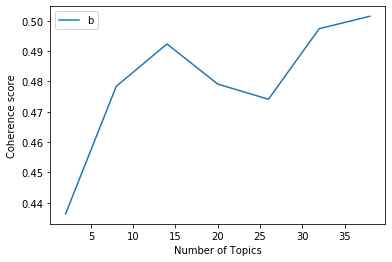

In [19]:
# Show graph
limit = 40; start = 1; step = 6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("boherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4363
Num Topics = 8  has Coherence Value of 0.4784
Num Topics = 14  has Coherence Value of 0.4924
Num Topics = 20  has Coherence Value of 0.4791
Num Topics = 26  has Coherence Value of 0.4741
Num Topics = 32  has Coherence Value of 0.4974
Num Topics = 38  has Coherence Value of 0.5015


In [ ]:
# Select the model and print the topics
optimized_model = model_list["Enter the index number of the model that gives highest coherence score before flattening out."]
model_topics = optimized_model.show_topics(formatted=False)
pprint(optimized_model.print_topics(num_words = 10))